# Task 4: Bonus

We have provided you with the data of a discharging capacitor together with a loop
containing a resistor. Charge on the capacitor (dependent variable) is a function of
time(independent variable) and varies exponentially according to the following equation:
Given $V_0 = 5V$, perform linear regression on the data and report the values of
$Capacitance(C)$ and $Resistance(R)$.

$$Q = CV_0e^{-t/RC} $$
Note: You cannot directly perform linear regression since the function is an exponential
one. You have to figure out another way to use linear regression on the dataset

In [2]:
import pickle # to save and load the model
from numpy import array, array_split, var, subtract, mean, square, unique, absolute # to calculate the variance
import matplotlib.pyplot as plt # to plot the data
import random # to generate random numbers
from sklearn.preprocessing import PolynomialFeatures # to create polynomial features
from sklearn.linear_model  import LinearRegression # to create the model
import math 

In [4]:

def load_dataset(file):
    '''function to load the datase from the pickle file
    input: file name
    output: dataset
    '''

    with open(file, 'rb') as f:
        return pickle.load(f)

train_dataset = load_dataset('data/capacitor_dataset.pickle')



In [5]:
def split_into_features_labels(dataset):
    '''function to split the dataset into features and labels
    input: dataset
    output: features, labels
    '''
    x = [[d[0]] for d in dataset]
    y = [d[1] for d in dataset]
    return x, y

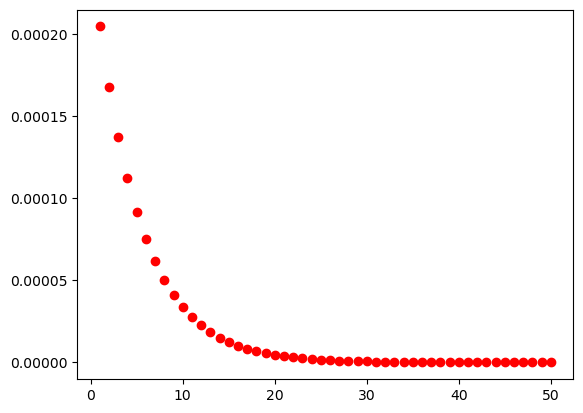

In [6]:

X_train, Y_train = split_into_features_labels(train_dataset)
plt.scatter(X_train[:50], Y_train[:50], color='red', label='train')
Y_train =[math.log(y) for y in Y_train]

In [7]:
class Model(): 
    def __init__(self , Xtrain , Ytrain , degree):
        self.degree= degree
        self.Xtrain= Xtrain
        self.Ytrain= Ytrain
        self.model = LinearRegression()

    def train(self): 
        self.model = self.model.fit(self.Xtrain, self.Ytrain)
    



In [8]:
model = Model(X_train ,Y_train , 1)

In [9]:
model.train()
print(model.model.coef_)
print(model.model.intercept_)


[-0.2]
-8.294049640102102


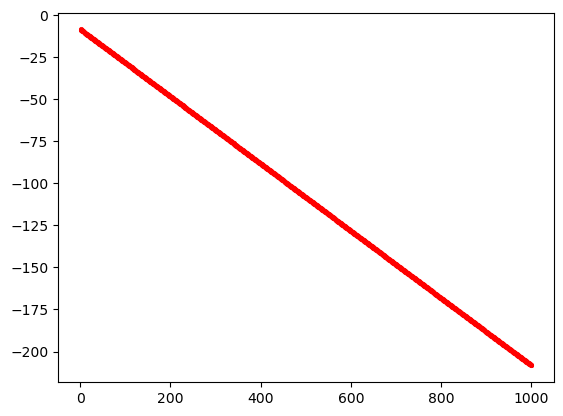

In [10]:
plt.scatter(X_train, Y_train, color = 'red', label = 'train' , s= 10,linewidths=0.5)

In [11]:
Capacitance = math.exp(model.model.intercept_)/5


In [12]:
Resistance = -1 / (Capacitance*model.model.coef_[0]);

In [13]:
print("Capacitance = ", Capacitance)
print("Resistance = ", Resistance)


Capacitance =  4.999999999999627e-05
Resistance =  100000.00000000751
